In [6]:
import pandas as pd

df_hx01 = pd.read_csv('/Users/mitoura/Documents/LYB/database/heat_exchanger.csv')
df_hx01.head()

,Timestamp,Water Inlet Temperature,Glycol Inlet Temperature,Out Glycol Temperature,Out Water Temperature,Heat Efficiency
0,2022-01-01,33.49,85.82,46.50,61.808856,96.454517
1,2022-01-02,33.51,86.35,46.75,61.894941,96.432576
2,2022-01-03,33.39,85.98,46.55,61.672872,96.410674
3,2022-01-04,33.32,85.71,46.51,61.403079,96.388810
4,2022-01-05,32.86,87.54,46.71,61.583481,96.366986


In [7]:
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [14]:
def life_estimation(limit):
    df = pd.read_csv('/Users/mitoura/Documents/LYB/database/heat_exchanger.csv')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)
    df.sort_index(inplace= True)

    var = df['Heat Efficiency']

    cont = []
    n = 1
    for i in df.index:
        cont.append(n)
        n +=1

    DATA = pd.DataFrame({"HXE":var.values, "Cont":cont}, index = var.index)

    # We will do the regression based on the RMAA and the created column (cont) 
    # since it is not possible to do a direct regression of the RMAA based on the 
    # Timestemp using the package we know and how we know it

    y = DATA[["HXE"]]
    x = DATA[["Cont"]]

    # Defining the model
    model = LinearRegression()
    model.fit(x, y)

    # Calculating the initial values
    y = model.intercept_+ DATA['Cont'][0]*model.coef_
    init = df.index[0]

    # We will loop to extrapolate the entered range and identify 
    # the time when the RMAA is less than or equal to the limit

    y_calc = []
    date = []
    cont = 1
    while y >= limit:
        cont += 1
        y = model.intercept_+ cont*model.coef_
        y_calc.append(float(y))
        day = init + timedelta(days=cont)
        date.append(day)
    
    return print(f'The exchanger needs to be repaired at: {day}.\n* Maintenance time must be notified by {day - 30*timedelta(days=1)}.\n* It must be checked which backup equipment should be used during the maintenance period.\n* The glycol stream must be directed to the backup exchanger so that the glycol flow rate is not drastically reduced.\n* A glycol flow can reach a minimum value of 93% of the design flow.')

In [15]:
life_estimation(90)

The exchanger needs to be repaired at: 2022-12-11 00:00:00.
* Maintenance time must be notified by 2022-11-11 00:00:00.
* It must be checked which backup equipment should be used during the maintenance period.
* The glycol stream must be directed to the backup exchanger so that the glycol flow rate is not drastically reduced.
* A glycol flow can reach a minimum value of 93% of the design flow.


/var/folders/fz/r7jqn3bx2bs_kbn76hjwjsh40000gn/T/ipykernel_21260/4133518174.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = model.intercept_+ DATA['Cont'][0]*model.coef_


In [10]:
30*timedelta(days=1)

datetime.timedelta(days=30)

In [11]:
from datetime import timedelta

In [16]:
df = pd.read_csv('/Users/mitoura/Documents/LYB/database/contactor_tower.csv')
df.head()

,Timestamp,Dew Point,Contactor Pressure,Natural Gas Moisture,Contactor Temperature,Glycol Moisture,Glycol Level
0,2022-01-01,-10.485669,182.000000,1.813583,45.540540,0.41,99.35
1,2022-01-02,-13.739576,182.000000,1.435444,41.613107,0.39,99.29
2,2022-01-03,-14.659537,183.000000,1.337726,41.194645,0.37,99.23
3,2022-01-04,-12.612642,183.000000,1.552262,44.221772,0.37,99.17
4,2022-01-05,-13.893597,181.056036,1.424008,44.474719,0.33,99.11


In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

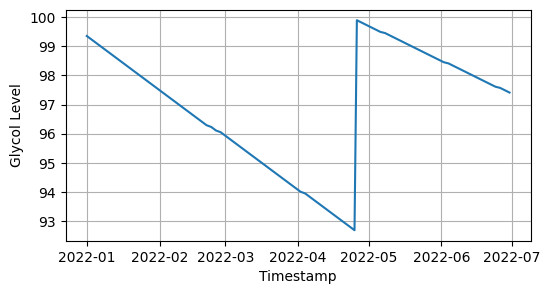

In [43]:
y = df['Glycol Level']

import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.plot(y)
plt.xlabel('Timestamp')
plt.ylabel('Glycol Level')
plt.grid(True)
plt.show()

/Users/mitoura/Documents/LYB/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mitoura/Documents/LYB/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mitoura/Documents/LYB/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mitoura/Documents/LYB/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as star

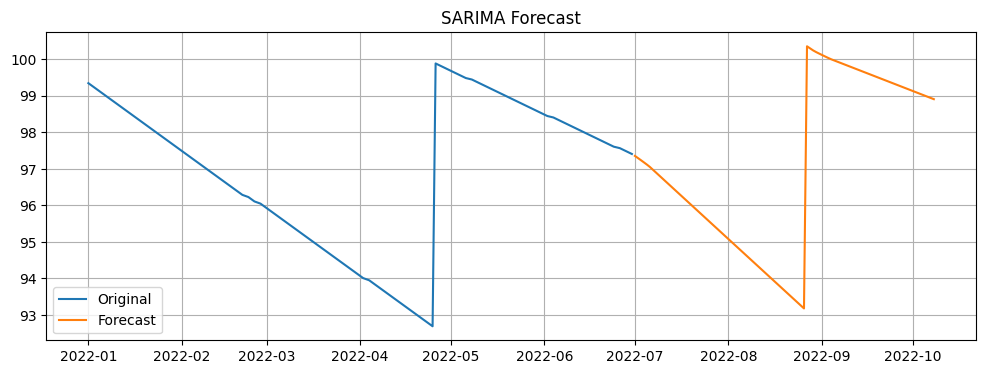

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Vamos supor que 'y' seja a coluna 'Glycol Level' do seu conjunto de dados
# Substitua os valores de 'y' pelo seu conjunto de dados real
y = df['Glycol Level']

# Ajustar o modelo SARIMAX
model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 3, 60))
fit = model.fit(disp=0)

# Fazer a previsão
forecast = fit.forecast(steps=100)

# Plotar os resultados
plt.figure(figsize=(12, 4))
plt.title('SARIMA Forecast')
plt.plot(y.index, y, label='Original')
plt.plot(pd.date_range(start=y.index[-1], periods=101, freq='D')[1:], forecast, label='Forecast')
plt.legend()
plt.grid(True)
plt.show()
